In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

from src.data.load_data import load_data

ModuleNotFoundError: No module named 'src'

In [5]:
# Load data
data_path = 'data/train/train.csv'
data = load_data(data_path)

../data/train/train.csv


In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
#data.head()
#data.info()

In [36]:
data_train = data.copy()

In [11]:
#Let's analize those columns with null values

# Columns with null values
null_columns = data_train.isnull().sum().sort_values(ascending=False)
null_columns = null_columns[null_columns > 0]

# Temp DataFrame of columns with null values
output_table = pd.DataFrame({
    "Column": null_columns.index,
    "NullCount": null_columns.values,
    "DataType": [data_train[col].dtype for col in null_columns.index],
    "UniqueValues": [
        ", ".join(map(str, data_train[col].dropna().unique())) if data_train[col].dtype == "object" else None
        for col in null_columns.index
    ],
    "CorrelationWithSalePrice": [
        data_train[col].corr(data_train["SalePrice"]) if data_train[col].dtype != "object" else None
        for col in null_columns.index
    ], 
})

output_table.reset_index(drop=True, inplace=True)
output_table

,Column,NullCount,DataType,UniqueValues,CorrelationWithSalePrice
0,PoolQC,1453,object,"Ex, Fa, Gd",NaN
1,MiscFeature,1406,object,"Shed, Gar2, Othr, TenC",NaN
2,Alley,1369,object,"Grvl, Pave",NaN
3,Fence,1179,object,"MnPrv, GdWo, GdPrv, MnWw",NaN
4,MasVnrType,872,object,"BrkFace, Stone, BrkCmn",NaN
5,FireplaceQu,690,object,"TA, Gd, Fa, Ex, Po",NaN
6,LotFrontage,259,float64,None,0.351799
7,GarageYrBlt,81,float64,None,0.486362
8,GarageCond,81,object,"TA, Fa, Gd, Po, Ex",NaN
9,GarageType,81,object,"Attchd, Detchd, BuiltIn, CarPort, Basment, 2Types",NaN


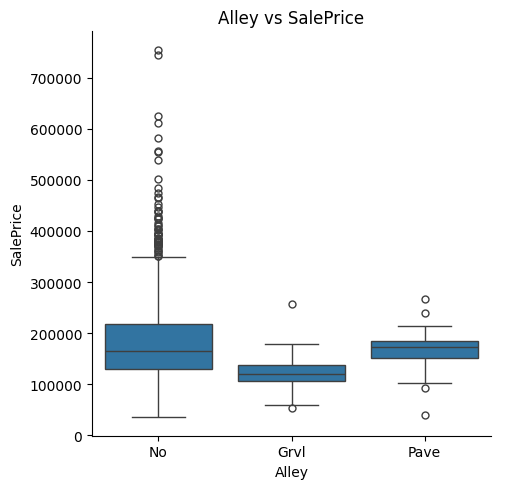

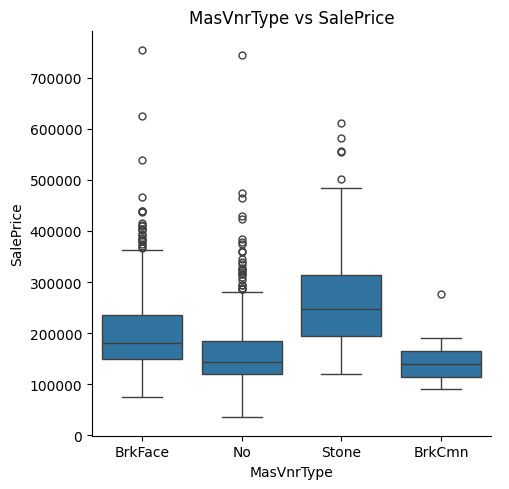

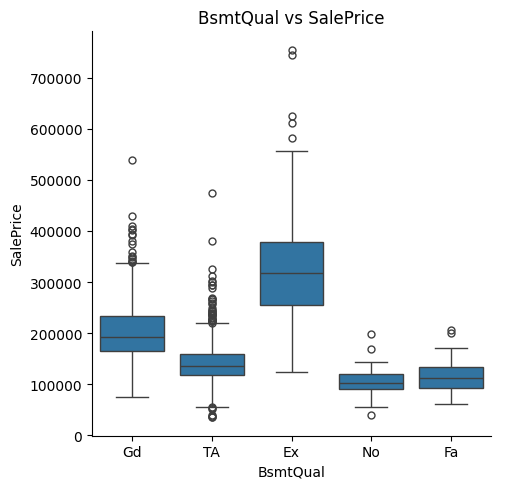

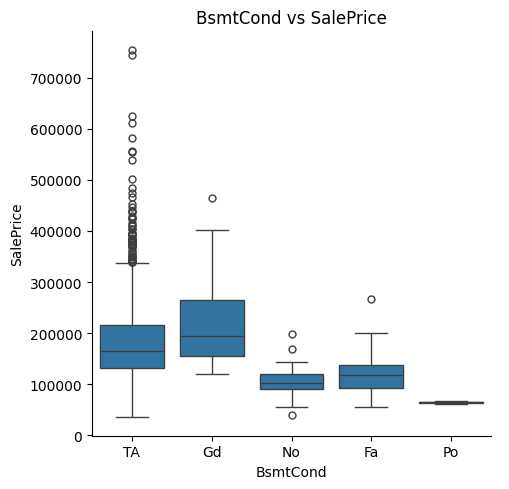

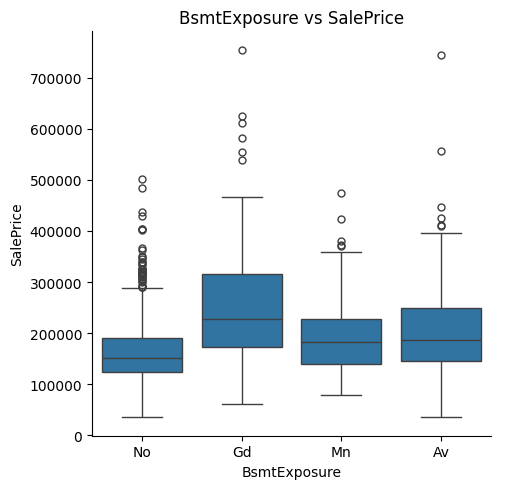

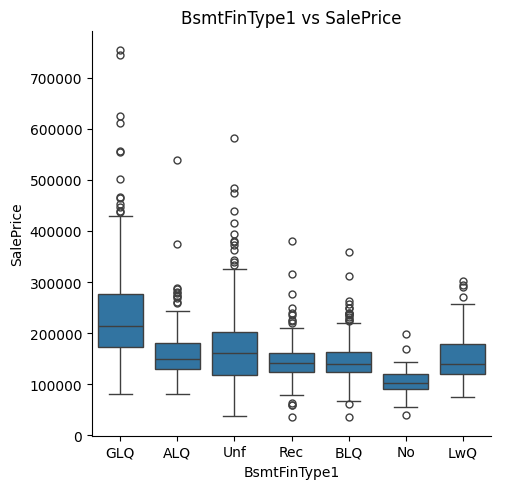

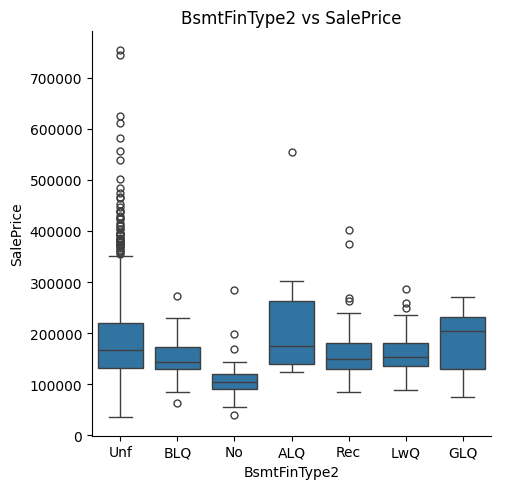

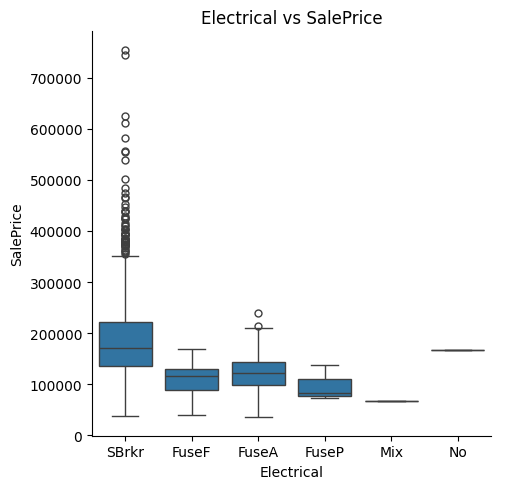

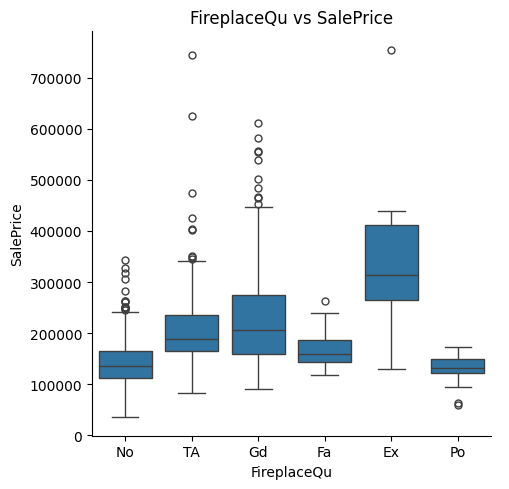

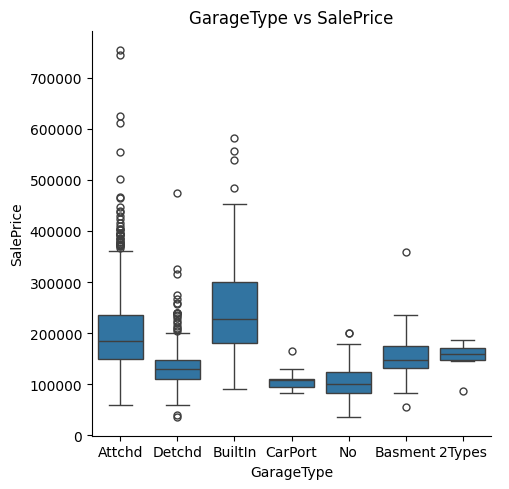

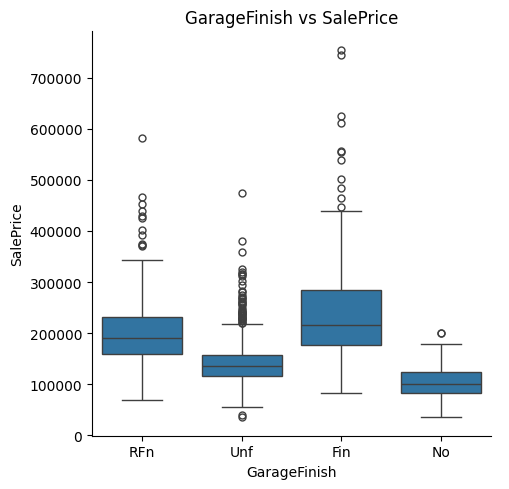

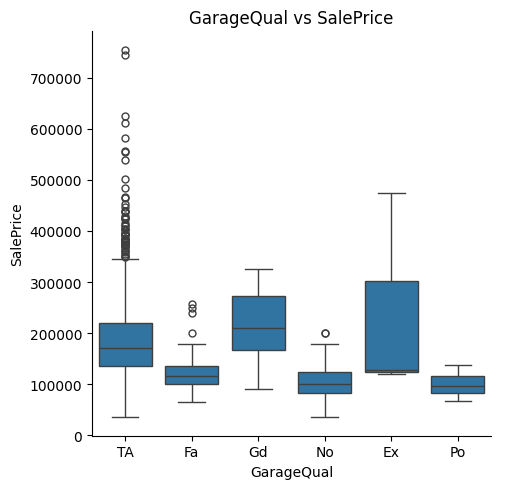

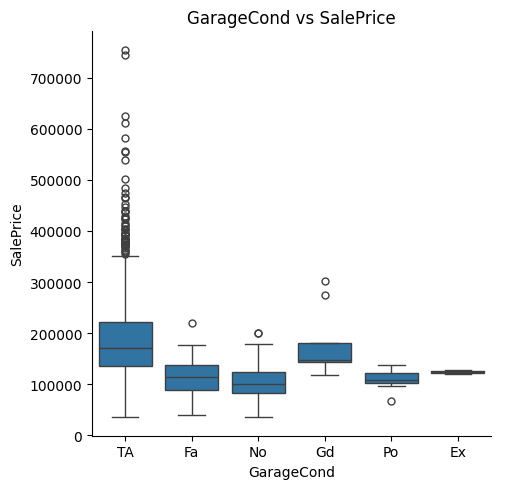

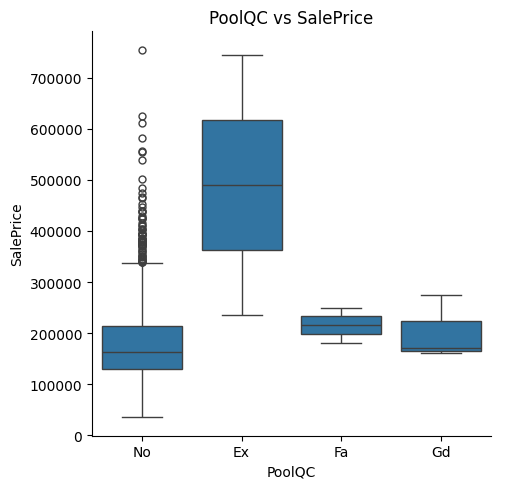

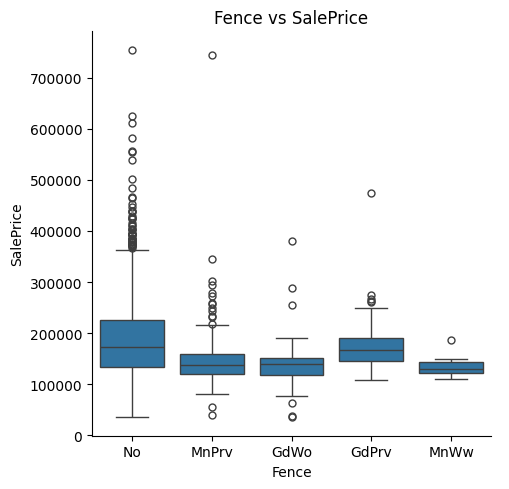

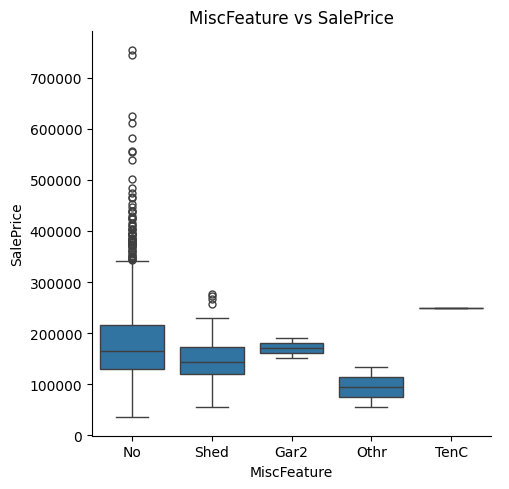

In [12]:
#Lets plot string columns with null values agains the selling price

string_columns = data_train.select_dtypes(include=["object"])
string_columns_with_nulls = [col for col in string_columns.columns if data_train[col].isnull().any()]

# Assign 'No' as default value
data_train[string_columns_with_nulls] = data_train[string_columns_with_nulls].fillna("No")

# Plot value vs SalePrice
for column in string_columns_with_nulls:
    sns.catplot(
        x=column,
        y="SalePrice",
        data=data_train,
        kind="box",
        aspect=1,
    )
    plt.title(f"{column} vs SalePrice")
    plt.tight_layout()
    plt.show()

# We'll drop: 'Alley','MasVnrType','BsmtCond','PoolQC','Fence','MiscFeature','GarageQual', 'GarageCond' and 'BsmtFinType2'

In [13]:
def plot_corr_heatmap(data, annot=False, full_size=False, corr_threshold = None):
    if full_size:
        plt.figure(figsize=(20,12))

    # Only numeric columns are selected
    numeric_data = data.select_dtypes(include=["number"])
    correlation_matrix = numeric_data.corr()
    
    annot_data = annot
    if annot and corr_threshold:
        annot_mask = correlation_matrix.abs() >= corr_threshold
        annot_data = np.where(annot_mask, correlation_matrix.round(2), "")
    
    sns.heatmap(
        correlation_matrix, 
        annot=annot_data if annot else False, 
        center=0, 
        cmap="coolwarm", 
        fmt="s",
        linewidth=.5 
    )
    
    #plt.show()

In [14]:
def getDatasetNumericColumns(dataset):
    return dataset.select_dtypes(include=['number']).columns.tolist()

In [64]:
numeric_columns = getDatasetNumericColumns(data)

In [66]:
numeric_columns_wo_price = numeric_columns.copy()
numeric_columns_wo_price.remove("SalePrice")
numeric_columns_wo_price.remove("Id")

In [39]:
len(data_train)

1458

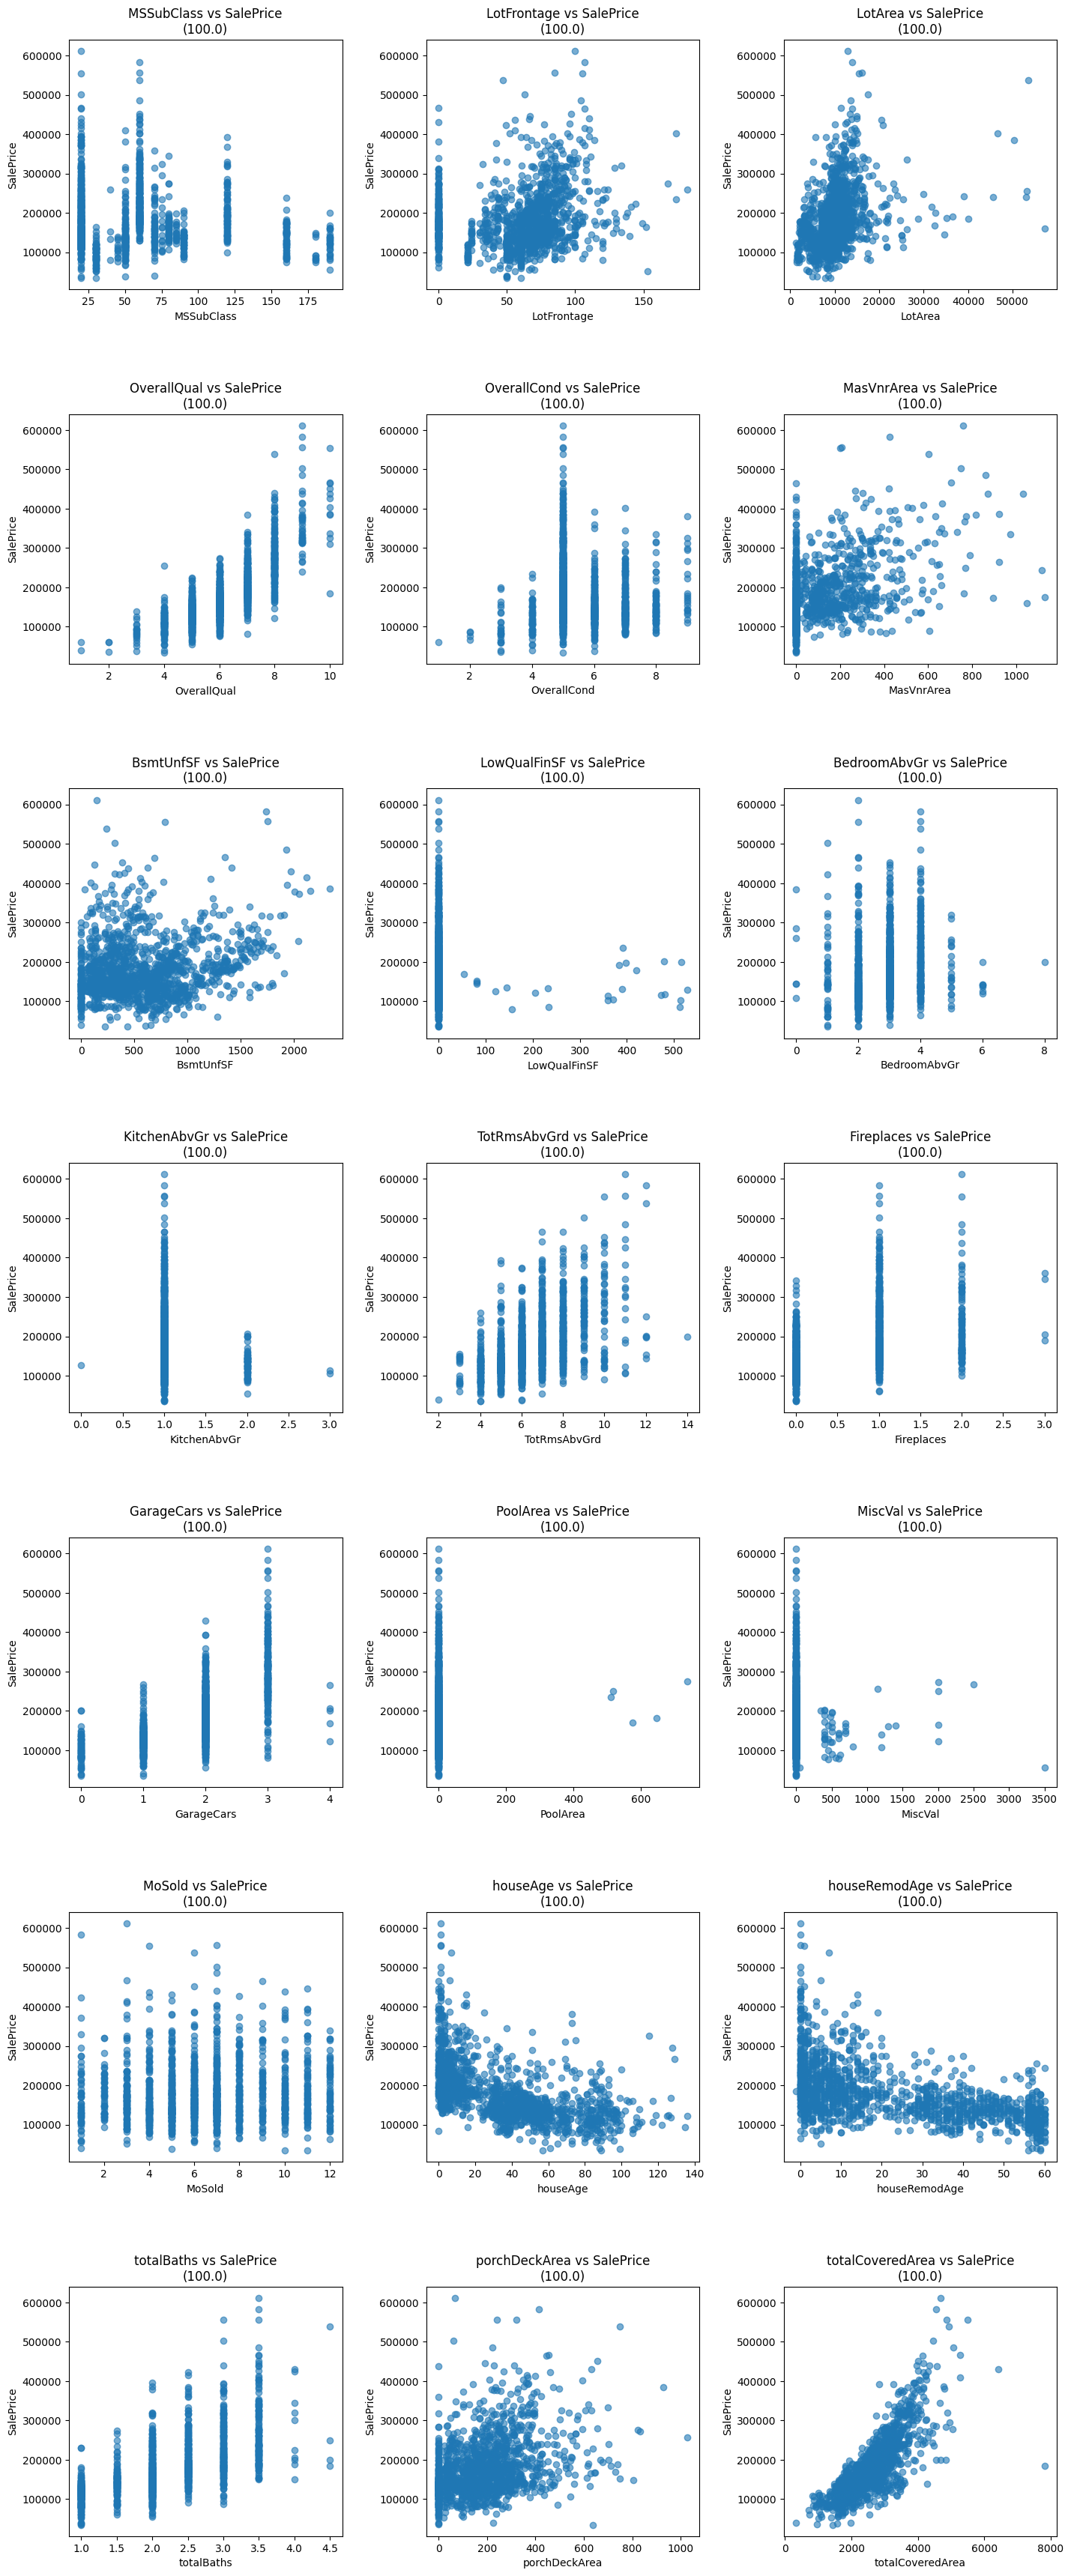

In [93]:
# Configurar los gráficos
num_columns = len(numeric_columns_wo_price)
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Get row needed
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Plot size

# Avoid overlaping
fig.tight_layout(pad=5.0)

# Dataset rows
total_rows = len(data_train)

# Scatter plots
for i, column in enumerate(numeric_columns_wo_price):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if rows > 1 else axes[col]

    # No null rows
    non_null_count = data_train[column].notna().sum()

    # Plot
    ax.scatter(data_train[column], data_train["SalePrice"], alpha=0.6)
    ax.set_title(f'{column} vs SalePrice\n({round(non_null_count * 100 / total_rows ,2)})')
    ax.set_xlabel(column)
    ax.set_ylabel("SalePrice")

# Hidde empty plots if overlaping
for j in range(i + 1, rows * 3):
    row = j // 3
    col = j % 3
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.axis("off")

# Plots with scroll
plt.subplots_adjust(hspace=0.5)
plt.show()

# Remove rows with:
# LotFrontage > 300 [934, 1298] 
# LotArea > 70000 [249, 313, 335, 451, 706]
# OverallCond [378, 691, 1182]
# MasVnrArea > 1300 [297, 1169]
# houseAge > 100 and SalePrice > 400000 [185]
# totalBaths >= 5 [738, 921]
# MiscVal >= 4000 [346, 1230]
# totalCoveredArea >= 6000 [496, 523]

# [934, 1298, 249, 313, 335, 451, 706, 378, 691, 1182, 297, 1169, 185, 738, 921, 346, 1230, 496, 523]
# Drop PoolArea => too little information

In [97]:

data_train.query('totalCoveredArea >= 6000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,houseAge,houseRemodAge,totalBaths,porchDeckArea,totalCoveredArea


In [19]:
#Este posiblemente se pueda eliminar
#No he borrado registros que se vayan de mano
def plotDataFromColumnList(dataset, numeric_columns_list):
    # Configurar los gráficos
    num_columns = len(numeric_columns_list)
    rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calcular el número de filas necesarias
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Tamaño del gráfico
    
    # Ajustar para evitar solapamiento
    fig.tight_layout(pad=5.0)
    
    # Total de filas en el dataset
    total_rows = len(dataset)
    
    # Generar los scatter plots
    for i, column in enumerate(numeric_columns_list):
        # Fila del gráfico (filas para gráficos están en posiciones pares, listados en posiciones impares)
        plot_row = (i // 3) * 2
        text_row = plot_row + 1
        col = i % 3
    
        # Ejes para el gráfico
        ax = axes[plot_row, col]
    
        # Calcular z-scores para la columna
        column_zscores = zscore(dataset[column].dropna())  # Ignorar NaN al calcular z-scores
        column_indices = dataset[column].dropna().index  # Índices de valores válidos
    
        # Obtener los 10 valores más extremos
        extreme_indices = column_indices[abs(column_zscores).argsort()[::-1][:10]]
        extreme_values = dataset.loc[extreme_indices, column]
        extreme_zscores = column_zscores[abs(column_zscores).argsort()[::-1][:10]]
    
        # Calcular porcentaje de valores encontrados
        non_null_count = dataset[column].notna().sum()
        percentage = round(non_null_count * 100 / total_rows, 2)
    
        # Crear el scatter plot
        ax.scatter(dataset[column], dataset["SalePrice"], alpha=0.6)
        ax.set_title(f'{column} vs SalePrice\n({round(non_null_count * 100 / total_rows ,2)})')
        ax.set_xlabel(column)
        ax.set_ylabel("SalePrice")
    
        # Ejes para el listado
        ax_text = axes[text_row, col]
        ax_text.axis("off")  # Desactivar los ejes del área de texto
    
        # Mostrar los valores y z-scores en el listado
        text = "\n".join(
            [f"{j + 1}. {val:.2f} (z={z:.2f})" for j, (val, z) in enumerate(zip(extreme_values, extreme_zscores))]
        )
        ax_text.text(0.5, 0.5, text, ha='center', va='center', fontsize=10)
    
    # Ocultar gráficos vacíos si sobran espacios
    for j in range(i + 1, rows * 3):
        ax = axes[(j // 3) * 2, j % 3]
        ax.axis("off")
        ax_text = axes[((j // 3) * 2) + 1, j % 3]
        ax_text.axis("off")
    
    # Mostrar el gráfico con scroll (usando IPython)
    plt.subplots_adjust(hspace=0.8)
    plt.show()

In [54]:
def add_features(dataset):
    dataset['houseAge'] = dataset['YrSold'] - dataset['YearBuilt']
    dataset['houseRemodAge'] = dataset['YrSold'] - dataset['YearRemodAdd']
    #dataset['garageAge'] = dataset['YrSold'] - dataset['GarageYrBlt']
    dataset['totalBaths'] = dataset['BsmtFullBath'] + dataset['FullBath'] + 0.5* (dataset['HalfBath'] + dataset['BsmtHalfBath'])
    dataset['porchDeckArea'] = dataset['WoodDeckSF'] + dataset['OpenPorchSF'] + dataset['EnclosedPorch'] + dataset['3SsnPorch'] + dataset['ScreenPorch']
    #dataset['totalFinArea'] = dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']
    dataset['totalCoveredArea'] = dataset['GrLivArea'] + dataset['TotalBsmtSF']

    return dataset

In [55]:
def drop_features(dataset):
    #drop columns with little que-dar?
    dataset = dataset.drop(columns=['Id','Alley','MasVnrType','BsmtCond','PoolQC','Fence',
                                    'MiscFeature','GarageQual','GarageCond', 'BsmtFinType2'])
    
    #drop columns used in add_features
    dataset = dataset.drop(columns=['YrSold','YearBuilt','YearRemodAdd','BsmtFullBath',
                                   'FullBath','HalfBath','BsmtHalfBath','WoodDeckSF',
                                   'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                                    'BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','GrLivArea',
                                   'TotalBsmtSF','GarageYrBlt','GarageArea'])
    #drop columns no-representatives

    return dataset

In [56]:
def fill_null_values(dataset):
    string_columns_with_nulls = ['FireplaceQu','GarageFinish','GarageType',
                                 'BsmtExposure','BsmtFinType1','BsmtQual','Electrical']
    dataset[string_columns_with_nulls] = dataset[string_columns_with_nulls].fillna("No")
    
    numeric_columns_with_nulls = ['LotFrontage','MasVnrArea']
    dataset[numeric_columns_with_nulls] = dataset[numeric_columns_with_nulls].fillna(0)

    return dataset

In [57]:
def feature_engineering(dataset):
    dataset_final = dataset.copy()
    dataset_final = add_features(dataset_final)
    dataset_final = drop_features(dataset_final)
    dataset_final = fill_null_values(dataset_final)
    
    return dataset_final

In [58]:
data_train = feature_engineering(data)

In [55]:
getDatasetNumericColumns(data_train)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'houseAge',
 'houseRemodAge',
 'totalBaths',
 'porchDeckArea',
 'totalCoveredArea']

In [ ]:
#plot_corr_heatmap(data_train[['totalFinArea', 'totalCoveredArea','SalePrice']], True, False, 0.5)
#plot_corr_heatmap(data_train[['GarageArea', 'GarageCars','SalePrice']], True, False, 0.5)

# Sinze both GarageArea and GarageCars have similar correlation with SalePrice, and both are always informed
# we'll drop GarageArea and keep GarageCars due to it's categorical value

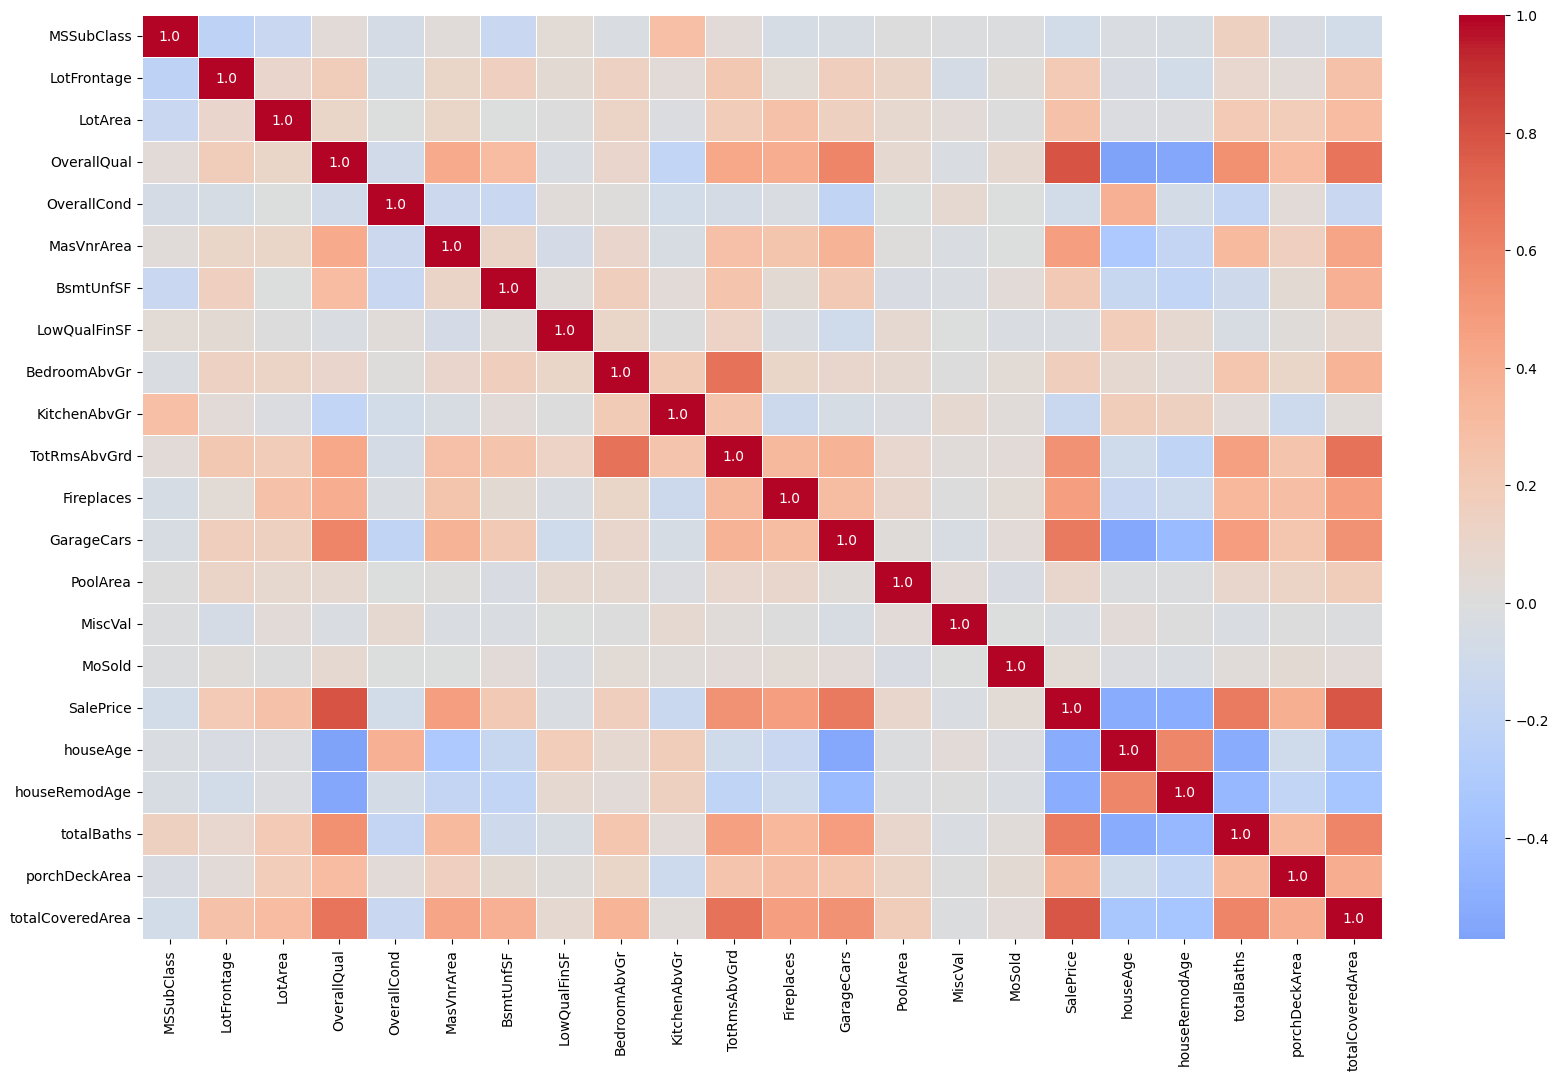

In [56]:
plot_corr_heatmap(data_train, True, True, 0.8)

#Drop GarageArea and GarageCars (check both are always simultaniously informed)

<Axes: xlabel='SalePrice', ylabel='Count'>

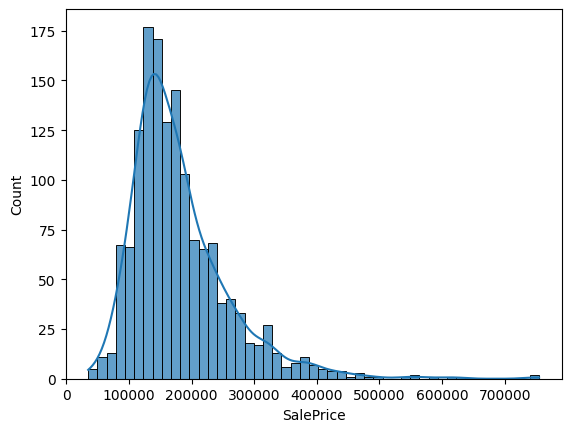

In [63]:
#SalePrice distribution
sns.histplot(data_train["SalePrice"], kde=True, alpha=0.7)

<Axes: xlabel='SalePrice', ylabel='Count'>

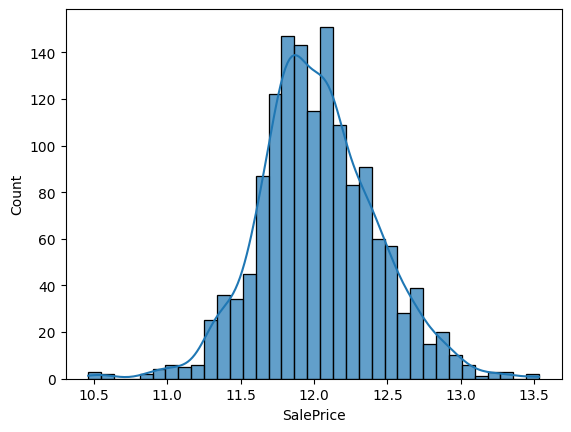

In [64]:
#Normalice SalePrice distribution 
sns.histplot(np.log1p(data_train["SalePrice"]), kde=True, alpha=0.7)

IndexError: index 13 is out of bounds for axis 0 with size 13

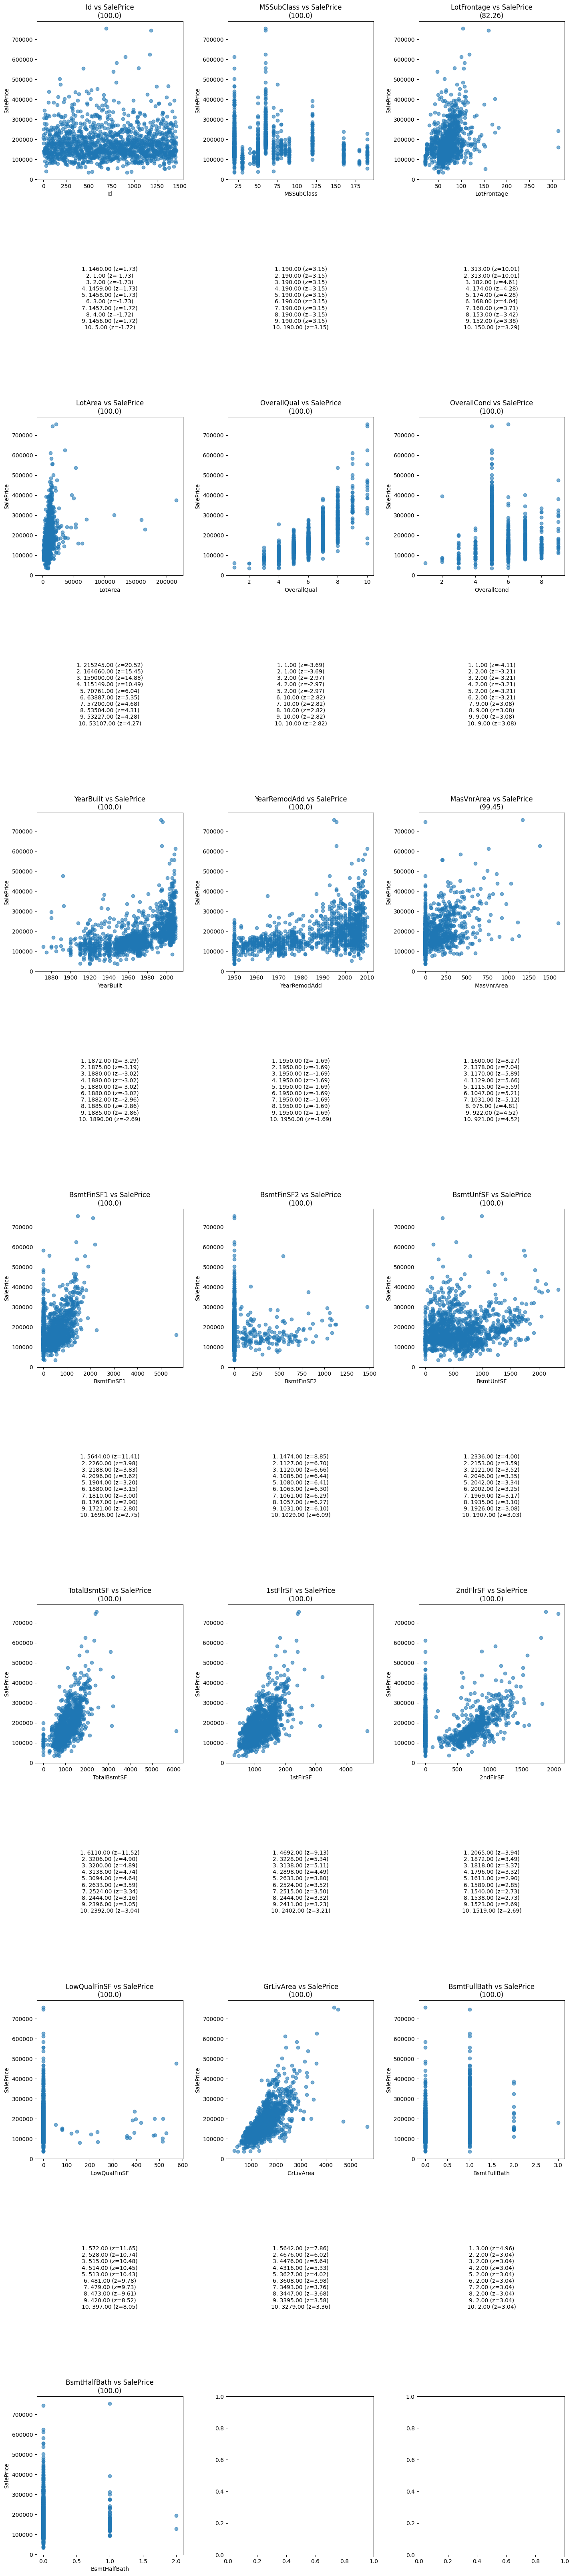

In [20]:
# Por ahora vamos a pasar de quitar los elementos que sobran 
plotDataFromColumnList(data_train, getDatasetNumericColumns(data_train))

IndexError: index 2 is out of bounds for axis 0 with size 2

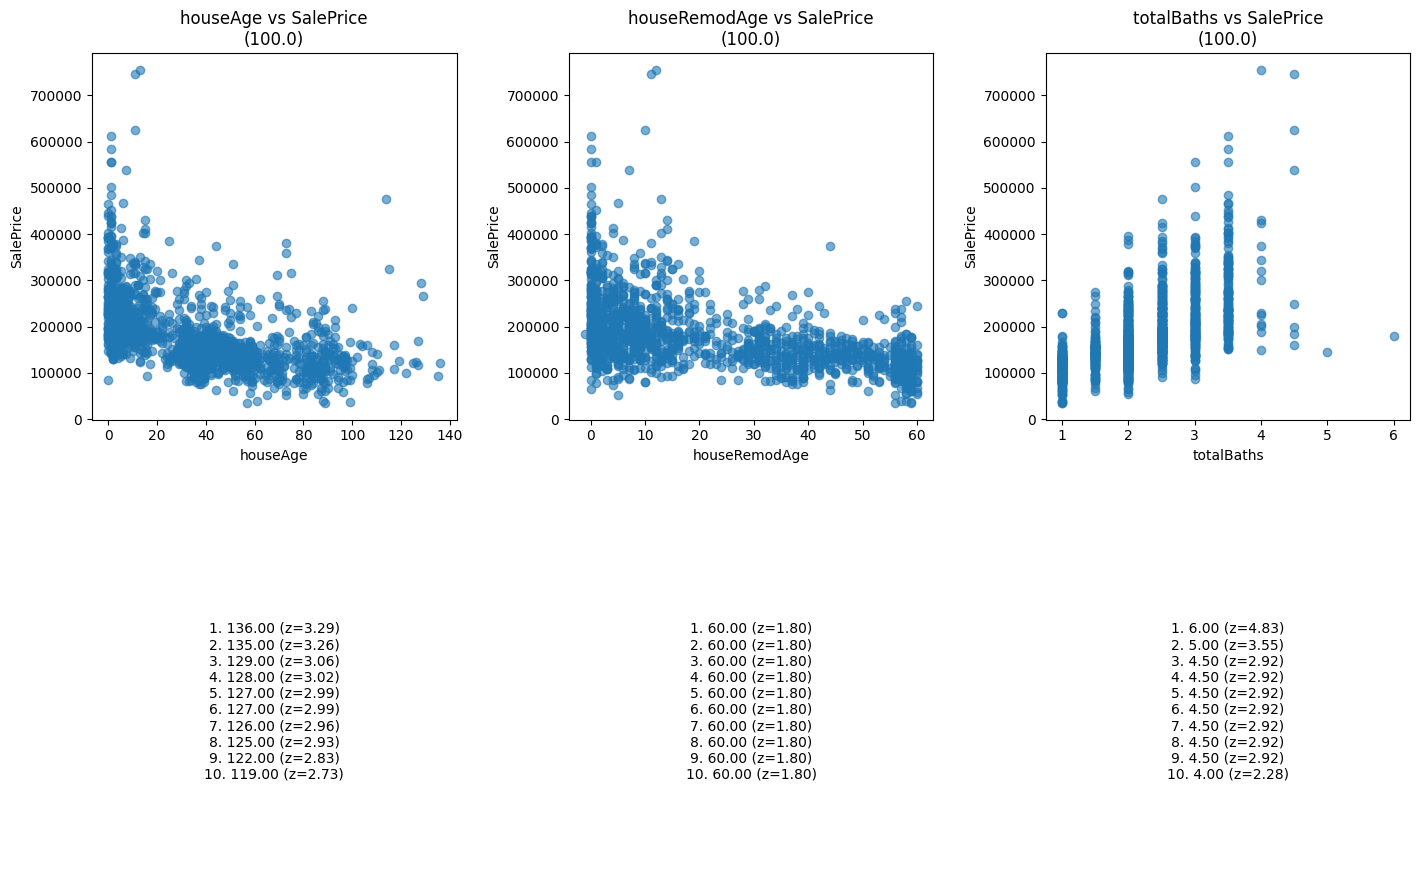

In [18]:
# plotDataFromColumnList(data_train, ['houseAge', 'houseRemodAge','totalBaths',
#                                     '1stFlrSF','2ndFlrSF','BsmtFinSF1'
#                                    ])

In [58]:
# Square feet colums have any strong correlation?
data_train_columns = data_train.select_dtypes(include=['number']).columns.tolist()
square_feet_columns = [col for col in data_train_columns if 'sf' in col.lower()] 
area_columns = [col for col in data_train_columns if 'area' in col.lower()] 
sq_area_columns = square_feet_columns + area_columns


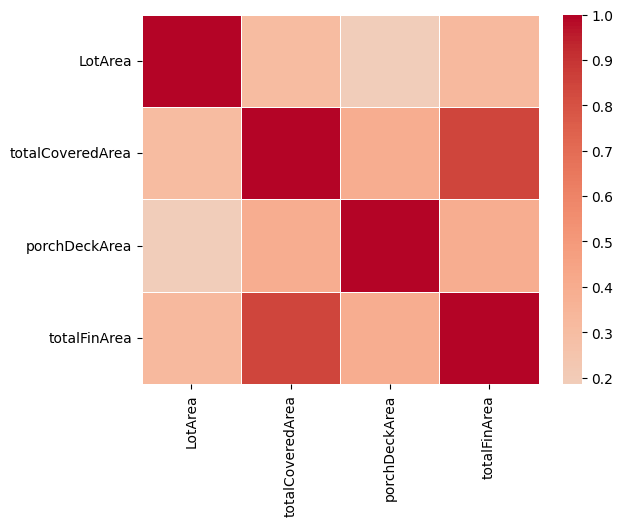

In [98]:
plot_corr_heatmap(data_train[['LotArea', 'totalCoveredArea', 'porchDeckArea', 'totalFinArea']])

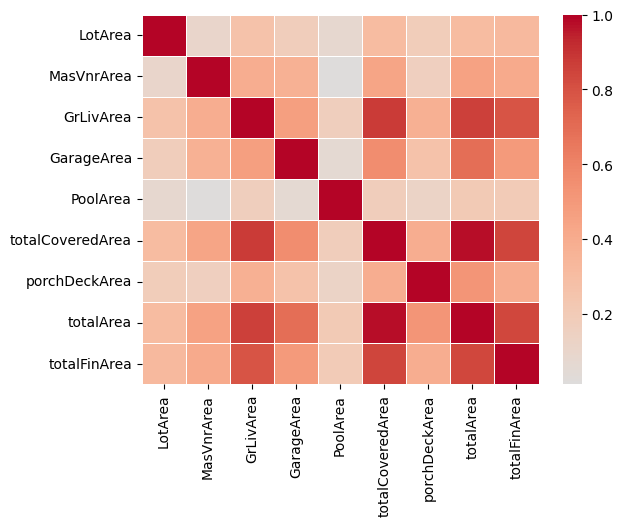

In [33]:
plot_corr_heatmap(data_train[area_columns])


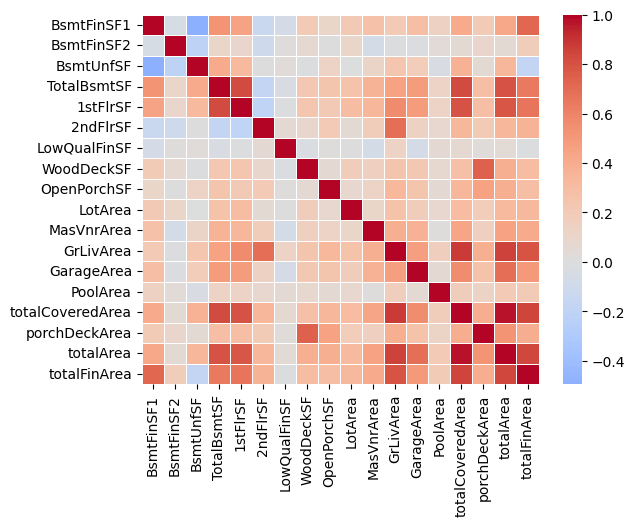

In [32]:
plot_corr_heatmap(data_train[sq_area_columns])


In [17]:
plot_corr_heatmap(data_train[square_feet_columns])

NameError: name 'square_feet_columns' is not defined